# WORKFLOW :-

data -> data pre-processing -> Train-test split -> svm Model -> approve model

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the dataset

In [3]:
df = pd.read_csv('/content/Dataset.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

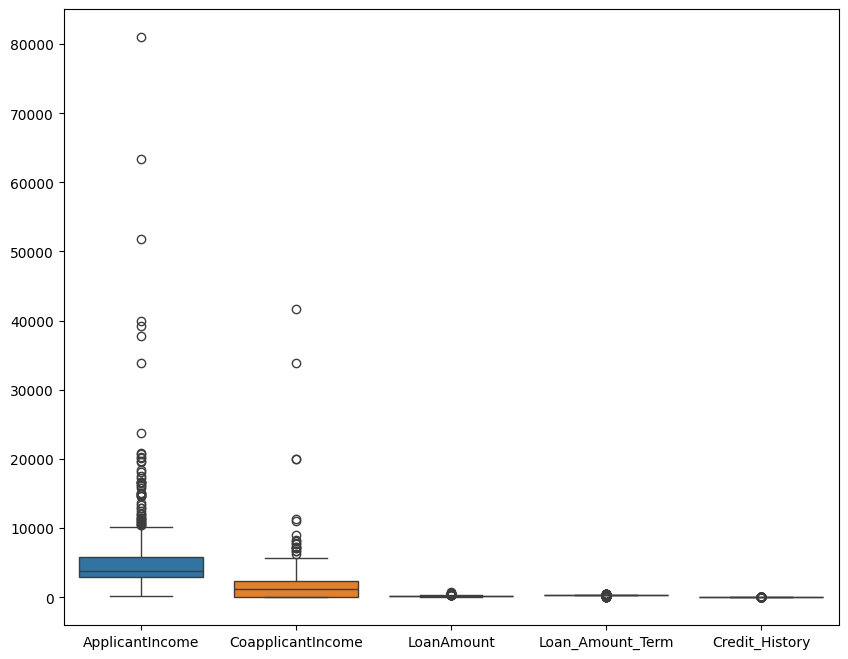

In [10]:
#checking outliars here

plt.figure(figsize=(10,8))
sns.boxplot(data = df)

In [11]:
#filling numerical data type NULL values with - Median
#mean is sensitive to outliar so choose median where outliar is high

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
#Filling Object data type null values
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [13]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# *Making a observation on each factor:-*


**On Gender**

NO. of male and female in loan applicant
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

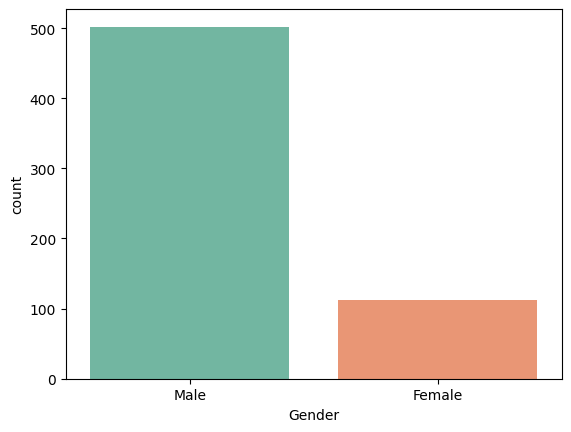

In [14]:
print("NO. of male and female in loan applicant")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data = df,palette='Set2')

from above we can observe male applicant >> female applicant

**On maritial status**

No. of applicant based on maritial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

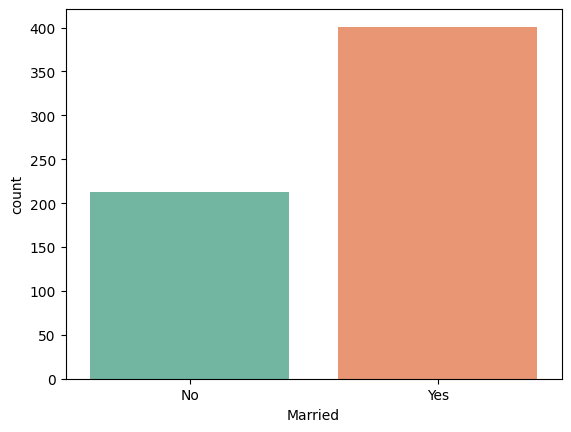

In [15]:
print("No. of applicant based on maritial status")
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data = df,palette = 'Set2')

married applicant are nearly twice of unmarried ones

**On Education basis**

Loan applicants based on education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

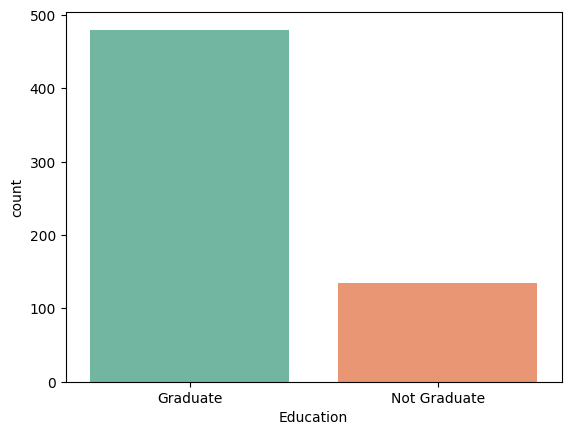

In [16]:
print('Loan applicants based on education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df,palette = 'Set2')

Graduate applicants are nearly 4 times of ungraduate

**On Self Employment**

Loan applicants based on self employment
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

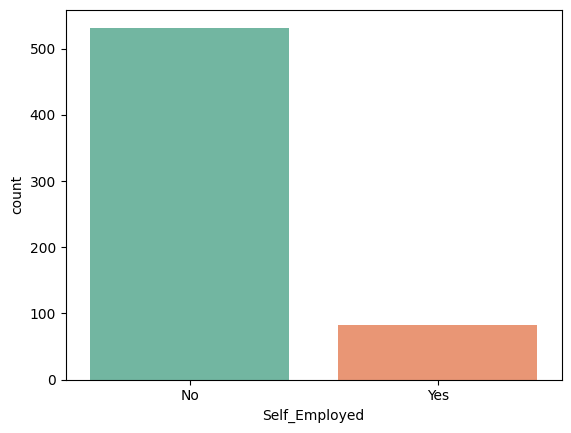

In [17]:
print('Loan applicants based on self employment')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data = df,palette = 'Set2')

applicants who are not self employed applies for loan(nearly 6.5 times) than not self employed ones

# Finding Co relation among features

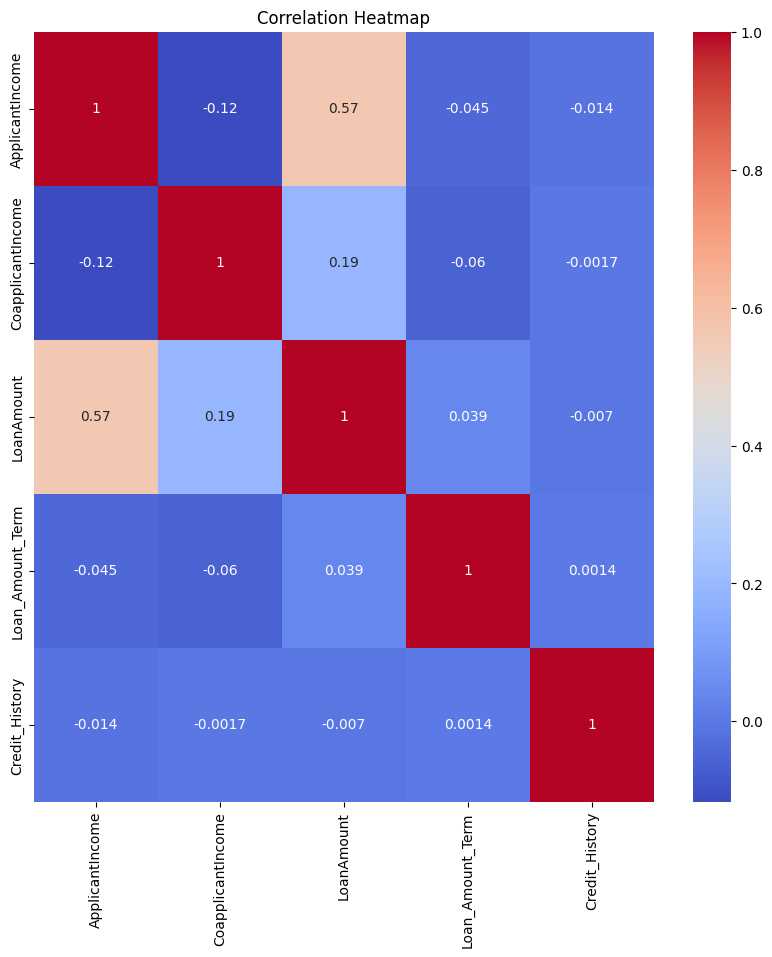

In [18]:
# Ensure df has only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation
corr = numeric_df.corr()

# Plot only if correlation matrix is not empty
if not corr.empty:
    plt.figure(figsize=(10,10))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Correlation matrix is empty. Check your data.")


from above we can see, features are not highly correlated(since,all corr-values < 0.9).Therefore, there is no need to drop any column

# Feature Engineering

In [19]:
#making a total applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


Total income,loan amount,loan amount term is too widely scattered, So applying log transformation,which will put them in a range and makes calc easy.

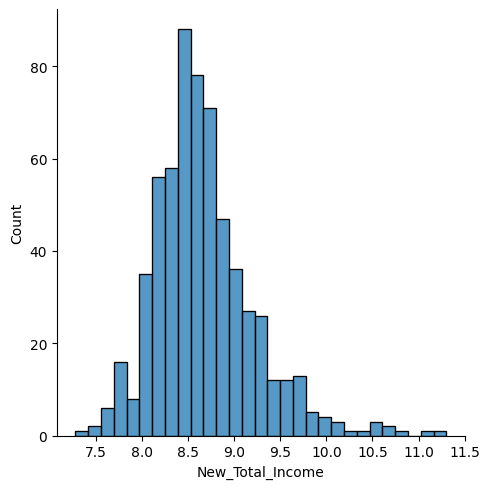

In [20]:
#applying log transformation on total income

df['New_Total_Income'] = np.log(df['Total_Income']+1
                              )
sns.displot(df['New_Total_Income'])

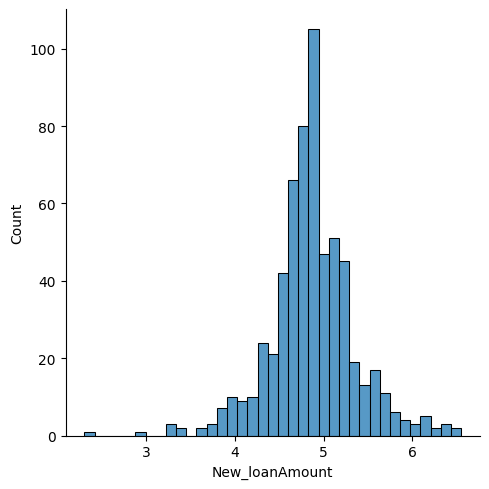

In [21]:
#applying log transformation on total income

df['New_loanAmount'] = np.log(df['LoanAmount']+1)

sns.displot(df['New_loanAmount'])

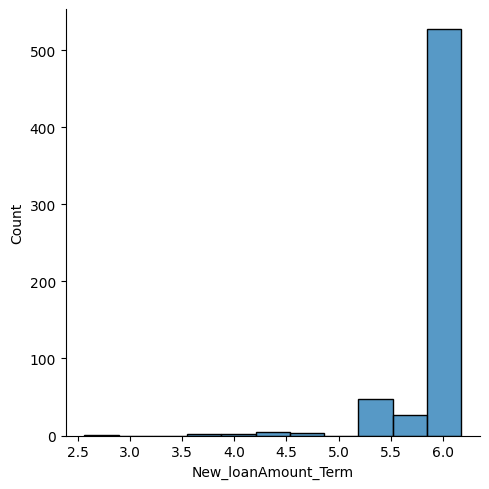

In [22]:
#applying log transformation on total income

df['New_loanAmount_Term'] = np.log(df['Loan_Amount_Term']+1)

sns.displot(df['New_loanAmount_Term'])

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


Dropping unnecessary features i.e - app_income, coapp_income, loan_amount, Loan_Amount_Term

In [24]:
col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = col,axis = 1)

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   New_Total_Income     614 non-null    float64
 9   New_loanAmount       614 non-null    float64
 10  New_loanAmount_Term  614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


Now we have to convert categorical/object type data to numerical data using encoding:
Encoding techniques:- Label encoding, One Hot encoding.

Label encoding:-a method of converting categorical variables into numerical values by assigning each unique category a unique integer.

One Hot encoding:-For each category, a binary column is created. The column corresponding to the category is marked as 1, and all other columns are marked as 0.

In [27]:
from sklearn.preprocessing import LabelEncoder
colm = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents',"Loan_Status"]
lblen = LabelEncoder()
for col in colm:
    df[col] = lblen.fit_transform(df[col])

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.714732,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,8.505525,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int64  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    int64  
 7   Loan_Status          614 non-null    int64  
 8   New_Total_Income     614 non-null    float64
 9   New_loanAmount       614 non-null    float64
 10  New_loanAmount_Term  614 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


# Spliting dependant and independant features

In [30]:
X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [31]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dividing dep,indep to training and testing

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 29)

#Report of all models

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# Train models and get predictions
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

# Function to generate classification report
def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}\n")

# Generate reports
generate_classification_report("Logistic Regression", y_test, y_pred1)
generate_classification_report("Decision Tree", y_test, y_pred2)
generate_classification_report("Random Forest", y_test, y_pred3)
generate_classification_report("K-Nearest Neighbors", y_test, y_pred4)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.40      0.57        52
           1       0.81      0.99      0.89       133

    accuracy                           0.83       185
   macro avg       0.88      0.70      0.73       185
weighted avg       0.85      0.83      0.80       185


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.48      0.56      0.52        52
           1       0.82      0.77      0.79       133

    accuracy                           0.71       185
   macro avg       0.65      0.66      0.65       185
weighted avg       0.72      0.71      0.71       185


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.48      0.60        52
           1       0.82      0.95      0.88       133

    accuracy                           0.82       1

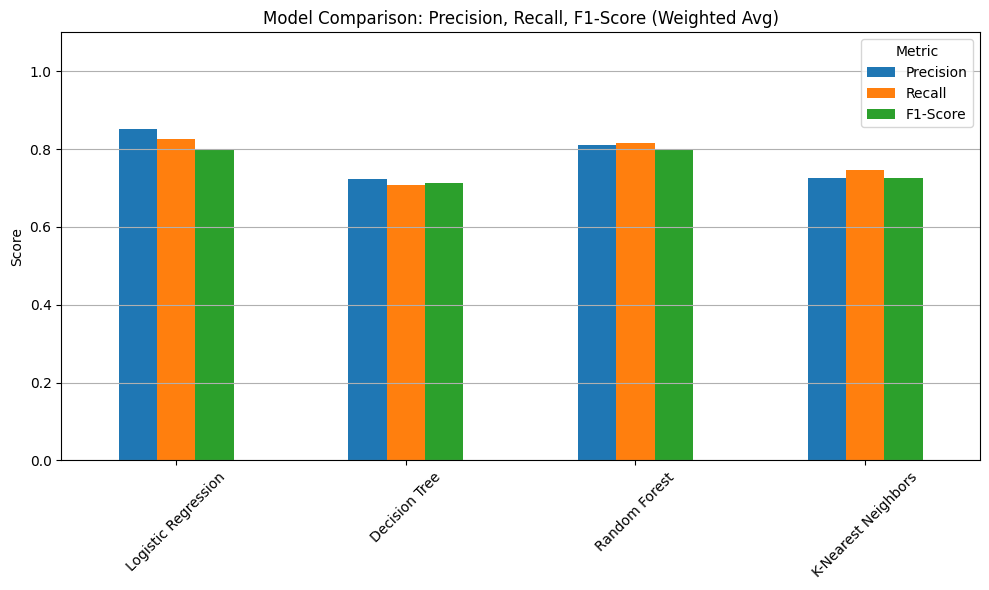

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

summary_scores = {}

# Your model predictions are already in y_pred1, y_pred2, ...
models = {
    "Logistic Regression": y_pred1,
    "Decision Tree": y_pred2,
    "Random Forest": y_pred3,
    "K-Nearest Neighbors": y_pred4
}

for name, y_pred in models.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    summary_scores[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

summary_df = pd.DataFrame(summary_scores).T

# Plotting
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Precision, Recall, F1-Score (Weighted Avg)')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [37]:
import pickle
import joblib

# Save using pickle (recommended)
with open('loan_model.pkl', 'wb') as f:
    pickle.dump(model3, f)

# Or save using joblib (alternative)
joblib.dump(model3, 'loan_model.joblib')

# Download the file to your computer
from google.colab import files
files.download('loan_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X.shape)  # Should be (num_samples, 10)
